# Learning outcome
1. gentle intro on cv
2. Recap on images as Numpy array
3. Image cropping
4. Splitting and merging of color channel
5. Point operators and gamma correction.
    - elementary operations: addition, substraction, multiplication and division
    - gamma correction (nonlinear technique)
6. Image blending (add 2 images together)

In [1]:
import sys
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
from util_func import show_img

## Recap on images as Numpy array

There are 2 primary type of images: **grayscale** and **color**.

| grayscale | color |


In [2]:
#Create a grayscale image
img = np.zeros((2,4),dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [3]:
img_color = cv. cvtColor(img,cv.COLOR_GRAY2BGR)
print(img_color)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
img[0,1] = 50
img [1,2] = 150

print(img)

[[  0  50   0   0]
 [  0   0 150   0]]


In [5]:
img_color = cv. cvtColor(img,cv.COLOR_GRAY2BGR)
print(img_color)

[[[  0   0   0]
  [ 50  50  50]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [150 150 150]
  [  0   0   0]]]


### Access element in array

In [6]:
img = cv.imread("images/lena.jfif")

a = img [49,219,2]
b = img.item(49,219,2)
a == b

True

In [7]:
%timeit a = img [49,219,2]
%timeit a = img.item(49,219,2)

94.5 ns ± 1.47 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
89.8 ns ± 0.886 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Numpy slicing

In [8]:
h , w = img.shape[:2]
yc, xc = h//2, w//2

topleft = img[:yc, :xc]
show_img("topleft",topleft)

In [9]:
# 60 x 60 central region of the image
center = img [yc-30 : yc+30, xc-30:xc+30]

show_img("center",center)

### create a white image

In [10]:
img = np.zeros((200,200)) + 255
img = np. uint8(img)

show_img("img",img)

### Exercise

In [11]:
# extract region of interest
img = cv.imread("images/flower.jfif")

show_img("img",img)

### there are 3 ways to get the indices needed

In [12]:
[i for i in dir(cv) if i.startswith("EVENT")]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [13]:
#1 way
img = cv.imread("images/flower.jfif")
img_copy = img.copy()

def rect_region(event, x,y,flags,params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        cv.circle(img, (x,y),1,(0,0,255),-1)
        cv.imshow("img",img)
    
cv.imshow("img",img)
cv.setMouseCallback("img",rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

(80, 42)
(187, 46)
(190, 133)
(77, 129)


In [14]:
flower = img[41:120,89:173]

show_img("flower",flower)

In [15]:
#2nd way
bbox = cv.selectROI("crop",img_copy)

flower = img_copy[int(bbox[1]):int(bbox[1]+bbox[3]),int(bbox[0]):int(bbox[0]+bbox[2])]

show_img("flower",flower)

In [16]:
#3rd way: paint app

In [17]:
img_arr = np.zeros((30,30),dtype = np.uint8)

img_arr[:10,10:20]=255
img_arr[10:20,:10]=255
img_arr[10:20,20:]=255
img_arr[20:,10:20]=255

img = np.tile(img_arr,(3,3))
show_img("pattern",img)

## Image cropping
why?
- Remove unwanted object
- seperate the image into a $3 \times 3$ grids. We move / adjust the camera in such a way the object of interest lies on the gridlines or their intersections. As such, your image would look more aethetically appealing. This is known as rile of third.
- One of the image augmentation methods for DL model training. 

In [18]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h,w = img.shape[:2]
#user defined parameter
n_vertical_grids = 4
n_horizontal_grids = 4

M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

tiles = []

for y in range(0,h,M):
    for x in range(0,w,N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w-1
            y1 = h-1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
        elif y1 > h:
            y1 = h -1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w -1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("crop",img_copy)

In [19]:
show_img("patch",tiles[9])

## Splitting and merging color channels

In [20]:
img = cv.imread("images/lena.jfif")

(b,g,r) = cv.split(img)
img_merge = cv.merge((b,g,r))
np.array_equal(img,img_merge)

True

In [21]:
import matplotlib.pyplot as plt

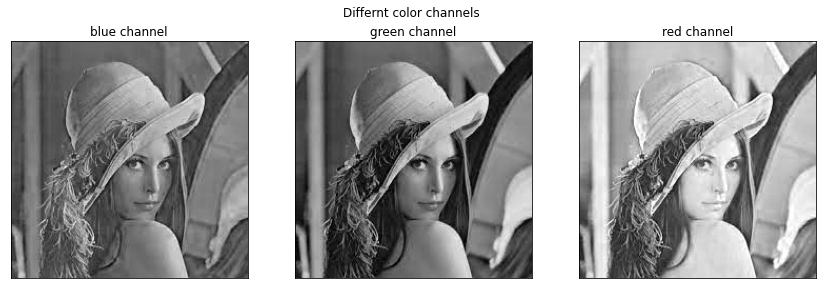

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (12,4),sharey = True)
fig.suptitle("Differnt color channels")

ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title = "blue channel", xticks = [], yticks = [])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title = "green channel", xticks = [], yticks = [])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title = "red channel", xticks = [], yticks = [])

plt.tight_layout()
plt.show()

### Exercise

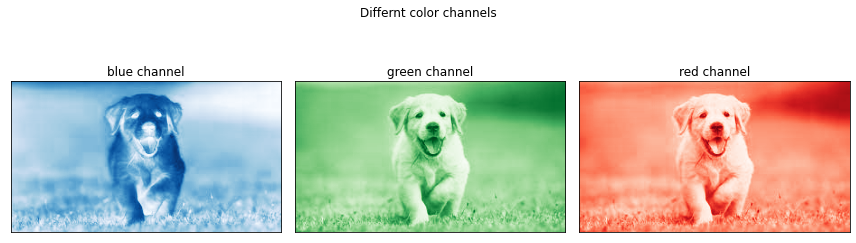

In [23]:
#wrong solution that i did it myself
img = cv.imread("images/dog.jfif")

(b,g,r) = cv.split(img)
img_merge = cv.merge((b,g,r))
np.array_equal(img,img_merge)
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (12,4),sharey = True)
fig.suptitle("Differnt color channels")

ax1.imshow(b, cmap=plt.cm.Blues)
ax1.set(title = "blue channel", xticks = [], yticks = [])
ax2.imshow(g, cmap=plt.cm.Greens_r)
ax2.set(title = "green channel", xticks = [], yticks = [])
ax3.imshow(r, cmap=plt.cm.Reds_r)
ax3.set(title = "red channel", xticks = [], yticks = [])

plt.tight_layout()
plt.show()

### display different channels in color images

In [24]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)
#color variable will be the window names
colors = ("blue","green","red")

imgs=[]

for i , ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr [...,i] = ch
    imgs.append(img_arr)
    
for c, img in zip(colors,imgs):
    cv.imshow(c,img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
Elemantary math operation: addition, substraction, multiplication and division.

$$f_{trans}(\textbf{x}) = \alpha f(\textbf{x}) + \beta$$

In [25]:
np.uint8(np.array([-2,0,255,300]))

array([254,   0, 255,  44], dtype=uint8)

In [26]:
def point_op(img,alpha,beta):
    """point operators of image. Arguments:
    1. source image
    2. multiplier
    3. constant"""
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res,0,255)
    return np.uint8(res)
    

In [27]:
img = cv.imread("images/bridge.jfif")

#increase the brightness and the contrast
transform = point_op(img,1.6,20)

cv.imshow("original",img)
show_img("transform",transform)

In [28]:
darken = point_op(img,1,-80)

show_img("img",darken)

## gamma correction
Technique to adjust brightness of image.

$$o = (\frac{I}{255})^{\gamma} \times 255$$

In [29]:
gamma = 1 / 2.2

lookUpTable = np.empty((1,256),dtype = np.uint8)

for i in  range(256):
    lookUpTable[0, i] = np.clip(pow(i/255.0,gamma)*255.0,0,255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img,lookUpTable)

cv.namedWindow("original",cv.WINDOW_NORMAL)
cv.imshow("original",img)
show_img("gamma correction",res,adjust=True)

### Image blending (add 2 images)
```
cv.addWeighted(img1,alpha,img2,1-aplha,beta
```

$$\textbf{x} = \alpha f(\textbf{x}) + (1 - \alpha)g(\textbf{x}) + \beta$$

In [30]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

#resize img2 to be th same dimension as img
h,w =img.shape[:2]
img2 = cv.resize(img2,(w,h))
alpha = 0.7

res = cv.addWeighted(img,alpha,img2,1-alpha,0)

cv.imshow("lena",img)
cv.imshow("resized coin",img2)
show_img("image blending",res)

### Exercise 1

In [31]:
w = 350
h = 350

random_noise_color = np.random.randint(0, 256, (h, w, 3), dtype=np.uint8)
random_noise_grayscale = np.random.randint(0, 256, (h, w), dtype=np.uint8)

cv.imshow("Noise_Color", random_noise_color)
cv.imshow("Noise_Grayscale", random_noise_grayscale)
cv.waitKey(0)
cv.destroyAllWindows()

### Exercise 2

In [32]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):

    # img is the source image
    img = cv.imread(img)
    h , w = img.shape[:2]
    img_copy = img.copy()

    # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
    M = int(h / num_vertical_grid)
    N = int(w / num_horizontal_grid)

    # line_color is the color of the grid line.

    # The output of the function should be image with grids

    tiles = []

    for y in range(0,h,M):
        for x in range(0,w,N):
            x1 = x + N
            y1 = y + M

            if x1 > w and y1 > h:
                x1 = w-1
                y1 = h-1
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
                tile = img[y:h, x:w]
                tiles.append(tile)

            elif y1 > h:
                y1 = h -1
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
                tile = img[y:h, x:x1]
                tiles.append(tile)

            elif x1 > w:
                x1 = w -1
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
                tile = img[y:y1, x:w]
                tiles.append(tile)

            else:
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)

    show_img("crop_grid",img_copy)

In [33]:
crop_grid("images/dog.jfif", 7,7, (88,190,200))

### Exercise 3

In [34]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

#resize img2 to be th same dimension as img
h,w =img.shape[:2]
img2 = cv.resize(img2,(w,h))

for alpha in range(0,71):
    alpha /= 70
    res = cv.addWeighted(img, alpha, img2, 1 - alpha, 0)
    cv.imshow("Image Blending", res)
    cv.waitKey(1)

cv.waitKey(0)
cv.destroyAllWindows()


### Exercise 4

In [35]:
# from the image show, the image is too large so that we need to resize after that
img = cv.imread("images/travel_hd.jpg")
show_img("HD image",img)

In [36]:
img = cv.imread("images/travel_hd.jpg")
watermark = cv.imread("images/watermark.jpg")

#image is resize to become smaller
img = cv.resize(img, None, fx=0.3, fy=0.3)

# calculating height and width of the watermark and image
h , w = img.shape[:2]
h_watermark,w_watermark = watermark.shape[:2]

# adding watermark to the image
dst = img[(h-h_watermark-15):h-20,20:w_watermark+20]
res = cv.addWeighted(dst,0.8, watermark, 0.2, 0)
img[h-h_watermark-20:h-20, 20:w_watermark+20] = res

# displaying watremarkedimage
cv.imwrite("watermarked.jpg", img)
show_img("Watermarked image",img)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'
